In [1]:
%matplotlib inline

In [2]:
from itertools import product
from functools import reduce
from functools import partial

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from statsmodels.datasets import co2
from statsmodels.tsa.arima_model import ARIMA

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = co2.load_pandas().data.interpolate()

In [5]:
orderParam = product(range(10), range(10), range(10))
estimator = partial(ARIMA, endog=data)

In [ ]:
errorOrder = {}
for order in orderParam:
    error = None
    try:
        error = mean_squared_error(estimator(order=order).fit().predict(), data)
        print("%s: %s" % (order, error))
    except:
        error = float('inf')
    errorOrder[order] = error

(0, 0, 0): 292.4037209450543
(0, 0, 1): 76.0147057371947
(0, 0, 3): 9.992195930226144
(0, 0, 5): 3.28377662387824


In [ ]:
bestPredictor = estimator(order=(7,0,7)).fit()

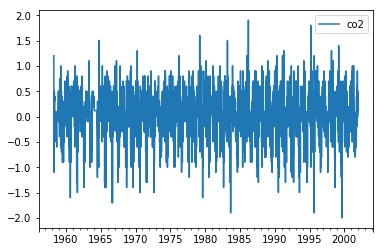

In [9]:
(data - data.shift(1)).plot()

In [10]:
import statsmodels.api as sm

In [18]:
decomposed = sm.tsa.seasonal_decompose(data)

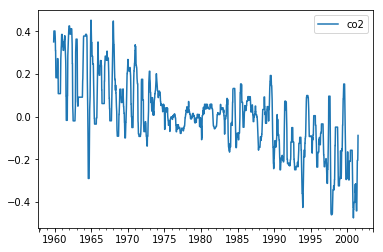

In [27]:
decomposed.resid.rolling(window=60).median().plot()